In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models import TfidfModel, Word2Vec
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from warnings import filterwarnings
import jieba
import jieba.analyse as analyse
import codecs


In [3]:
df = pd.read_csv("./data/news.csv", usecols=['zh_titles'], encoding='utf-8')
# 文件路径必须是英文，否则pandas读取会有问题
df.tail(10)

,zh_titles
4141,乌克兰-俄罗斯危机：外交步伐加快
4142,美国选手内森·陈在北京奥运会上夺得花样滑冰金牌，而对手于祖如·韩愈则步履蹒跚
4143,奥运直播：荷兰速滑选手努伊斯卫冕奥运冠军
4144,MarnieHunter和FrrestBrwn，CNN更新：2022年2月14日星期一20:...
4145,亚洲股市普遍走低，因市场关注乌克兰紧张局势
4146,为了“前世情人”洪永城节制用钱
4147,苏翊鸣：前童星成为北京2022年的焦点
4148,世卫组织欧洲警告称，与俄罗斯、乌克兰一样，东部地区的新冠疫情将上升，请
4149,随着德国总理斯科尔茨开始穿梭于两国之间，寻求避免冲突，俄罗斯继续在乌克兰附近进行大规模军事集...
4150,《疫情简讯》深圳新增两例本土确诊均为此前密接者；中国市监总局力推进口冷链食品追溯体系


In [4]:
def Jieba(sentence):
    content=[]
    seg_list = jieba.cut(sentence, cut_all=True)
    content = "  ".join(seg_list)
    print(content)
    content_S.append(content)
    return content

In [6]:
content_S = []
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为300，默认为50
pd.set_option('max_colwidth', 300)
f = codecs.open("jieba.txt", "w", "utf-8")    # 打开文件以便写入中文
print(df.applymap(Jieba), file = f)
f.close()  #  关闭文件

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\DELL\AppData\Local\Temp\jieba.cache
Loading model cost 0.659 seconds.
Prefix dict has been built successfully.


文  在  寅  尽管  历史  上有  过  口角  ，  但  仍  保持  保持稳定  稳定  的  对  日  双轨  关系
由于  俄罗斯  罗斯  和  乌克兰  克兰  边境  的  紧张  紧张局势  局势  ，  世界  世界各地  各地  的  市场  本周  开局  艰难  ，  华尔街  股市  在  动荡  的  交易  中小  小幅  下跌
约翰  约翰逊  主持  危机  机会  会议  ，  希望  通过  外交  交手  手段  结束  乌克兰  克兰  危机
香港  香港股市  港股  股市  下滑  2019  冠状  冠状病毒  病毒  疾病  斯托  斯托克  斯托克斯  托克  克斯  锁定  恐惧  乌克兰  克兰  俄  紧张  紧张局势  局势  削弱  风险  偏好
两届  奥运  奥运会  ，  一座  城市  和  一个  截然  截然不同  不同  的  中国
美国  、  日本  、  韩国  在  夏威夷  会面  讨论  朝鲜  问题
简讯  ：  韩美  日  外长  谴责  朝鲜  射弹  促  朝  对话
卡米  卡米拉  米拉  ·  瓦利  耶  娃  ：  国际  国际奥委会  奥委会  委会  驳斥  了  对  美国  和  俄罗斯  罗斯  运动  运动员  动员  双重  双重标准  标准  的  指控
商业  亮点  ：  3  月  加息  拜登  谈  通货  通货膨胀  膨胀
父母  寻求  从紧  紧张  的  乌克兰  克兰  安全  返回  病房
奥运  奥运会  女子  子花  花样  花样滑冰  滑冰  短期  项目  在  俄罗斯  罗斯  兴奋  兴奋剂  争议  的  阴影  下  进行
香港  香港股市  港股  股市  收盘  走低  乌克兰  克兰  风险  ；  金融  、  科技  公司  权衡
周二  ，  韦  斯  法  默  收购  澳大利  澳大利亚  大利  利亚  制药  药行  行业  的  228  页  计划  小册  小册子  册子  在  追加  保证  保证金  金通  通知  的  办公  办公桌  桌上  砰  地  一声  落下
2  月  15  日星  星期  星期二  奥运  奥运会  金牌  综述
曼  努  

In [20]:
df_jieba = pd.DataFrame(content_S)


In [19]:
cut_word_list = np.array([cont.split() for cont in df_jieba[0].tolist()])
dictionary = corpora.Dictionary(cut_word_list)
corpus = [dictionary.doc2bow(text) for text in cut_word_list]

d:\tools\anaconda\this\envs\nlp\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [21]:
# word2vec训练词向量
def word2vec_model():
    model = Word2Vec(cut_word_list, vector_size=200, window=5, min_count=1, seed=1, workers=4)
    model.save('word2vec.model')
word2vec_model()
# 加载模型得出词向量
model = Word2Vec.load('word2vec.model')
model.train(cut_word_list, total_examples=model.corpus_count, epochs=10)
wv = model.wv  # 所有分词对应词向量


In [22]:
# word2vec构建文档向量
def get_word2vec_vec(content=None):
    text_vec = np.zeros((content.shape[0], 200))
    for ind, text in enumerate(content):
        wlen = len(text)
        vec = np.zeros((1, 200))
        for w in text:
            try:
                vec += wv[w]
            except:
                pass
        text_vec[ind] = vec/wlen
    word2vec = pd.DataFrame(data=text_vec)
    word2vec.to_csv('word2vec.csv', index=False)
    return text_vec
    
word2vec = get_word2vec_vec(cut_word_list)


In [23]:
# 轮廓系数确定簇数 -> 最佳值为1，最差值为-1。接近0的值表示重叠的群集
def silhouette_score_show(data_vec=None, name=None):
    k = range(2, 10)
    score_list = []
    for i in k:
        model = KMeans(n_clusters=i).fit(data_vec)
        y_pre = model.labels_
        score = round(silhouette_score(data_vec, y_pre), 2)
        score_list.append(score)
    plt.figure(figsize=(12, 8))
    plt.plot(list(k), score_list)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('簇数', fontsize=15)
    plt.ylabel('系数', fontsize=15)
    plt.savefig(f'{name}轮廓系数.jpg')
    plt.show()

d:\tools\anaconda\this\envs\nlp\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Glyph 31751 (\N{CJK UNIFIED IDEOGRAPH-7C07}) missing from current font.
  app.launch_new_instance()
d:\tools\anaconda\this\envs\nlp\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  app.launch_new_instance()
d:\tools\anaconda\this\envs\nlp\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  app.launch_new_instance()
d:\tools\anaconda\this\envs\nlp\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31751 (\N{CJK UNIFIED IDEOGRAPH-7C07}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\tools\anaconda\this\envs\nlp\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\tools\anacon

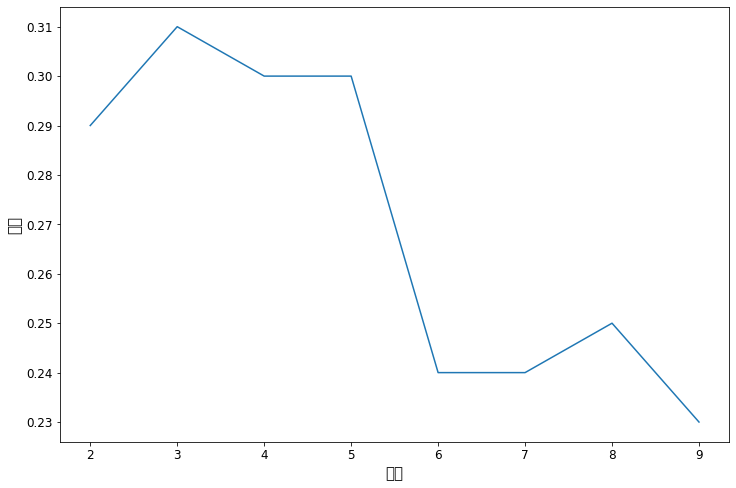

In [24]:
silhouette_score_show(word2vec, 'word2vec')